In [96]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.util import bigrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import MinMaxScaler
from nltk.tokenize import word_tokenize


In [97]:
# Define the path to the "datasets" folder relative to your current notebook's location.
datasets_folder = "../datasets"

### 1) % of each dataset in the unified dataset

In [98]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_binary.csv"

In [99]:
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

In [100]:
# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi = pd.read_csv(csv_file_path)

In [101]:
# Calculate the total number of "aggressive" and "hate" for all researchers
total_aggressive = df_tupi['aggressive'].sum()
total_hate = df_tupi['hate'].sum()

In [102]:
# Calculate the share percentage of each researcher in terms of "aggressive" and "hate"
grouped_data_tupi = df_tupi.groupby('researcher').agg({
    'aggressive': lambda x: round((x.sum() / total_aggressive) * 100, 0),
    'hate': lambda x: round((x.sum() / total_hate) * 100, 0)
}).reset_index()


In [103]:
# Rename columns for clarity
grouped_data_tupi = grouped_data_tupi.rename(columns={'aggressive': 'aggressive_share_percentage', 'hate': 'hate_share_percentage'})

In [104]:
grouped_data_tupi.head()

,researcher,aggressive_share_percentage,hate_share_percentage
0,fortuna et al,11.0,18.0
1,leite et al,43.0,34.0
2,oliveira et al,15.0,15.0
3,vargas et al,31.0,33.0


### 2) % of each type of hate speech for each researcher

In [105]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"

In [106]:
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

In [107]:
# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

In [59]:
df_tupi_hier =df_tupi_hier[["researcher","hate","ageism","aporophobia","body_shame","capacitism","lgbtphobia","political","racism","religious_intolerance","misogyny","xenophobia","other"]]

In [60]:
# Sum all columns except the "researcher" column
total_hate = df_tupi_hier.drop(columns=['hate','researcher']).sum()

In [61]:
hate_categories = ["ageism","aporophobia","body_shame","capacitism","lgbtphobia","political","racism","religious_intolerance","misogyny","xenophobia","other"] 

In [62]:
# Group by researcher and calculate the sum of each category
grouped_data_tupi_hier = df_tupi_hier.groupby('researcher').sum()

# Calculate the total hate count
total_hate = grouped_data_tupi_hier[hate_categories].sum(axis=1)

# Calculate the percentage of each type of hate relative to the total hate count
for category in hate_categories:
    grouped_data_tupi_hier[category] = round((grouped_data_tupi_hier[category] / total_hate) * 100, 2)

# Reset the index and select only the percentage columns without the "% of" prefix
grouped_data_tupi_hier = grouped_data_tupi_hier[hate_categories]

In [63]:
grouped_data_tupi_hier.head()

,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other
researcher,,,,,,,,,,,
fortuna et al,0.21,0.21,8.59,0.31,19.12,4.92,5.55,1.62,47.56,7.12,4.77
leite et al,0.00,0.00,0.00,0.00,6.28,0.00,2.52,0.00,8.45,2.75,80.00
oliveira et al,4.08,4.77,9.31,7.16,7.39,40.88,2.93,2.16,15.94,5.39,0.00
vargas et al,0.00,0.00,0.00,0.00,0.00,77.29,1.18,7.23,14.31,0.00,0.00


### 3) % of each type of hate speech (general)

In [64]:
# Calculate the total hate count
total_hate = df_tupi_hier[hate_categories].sum()

# Calculate the percentage of each type of hate relative to the total hate count
percentage_data = {}
for category in hate_categories:
    percentage_data[f'{category}'] = round((total_hate[category] / total_hate.sum()) * 100, 2)

# Create a DataFrame with a single row
final_table = pd.DataFrame(percentage_data, index=[0])

In [65]:
final_table.head()

,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other
0,0.61,0.7,3.04,1.06,8.59,12.27,3.1,1.15,17.88,3.81,47.78


### 4) Bigram with stopwods

In [66]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

In [67]:
df_tupi_hier['text'] = df_tupi_hier['text'].str.lower()

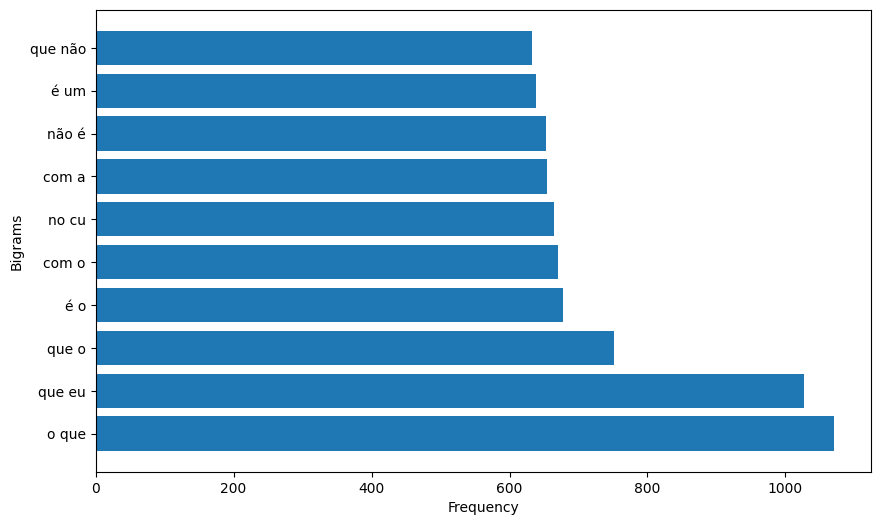

In [68]:
# Function to tokenize text, excluding specific words
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    
    return tokens

# Apply preprocessing to the 'text' column
df_tupi_hier['preprocessed_text'] = df_tupi_hier['text'].apply(preprocess_text)

# Create bigrams from the preprocessed text
df_tupi_hier['bigrams'] = df_tupi_hier['preprocessed_text'].apply(lambda x: list(bigrams(x)))

# Count the frequency of bigrams
bigram_frequency = Counter()
for bigram_list in df_tupi_hier['bigrams']:
    bigram_frequency.update(bigram_list)

# Get the most frequent bigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

most_common_bigrams = [(b, freq) for b, freq in bigram_frequency.most_common() if all(term not in b and all(char not in b for char in exclude_punctuation) for term in exclude_terms)][:10]

# Unzip bigram and frequency into separate lists and convert bigrams to strings
bigram, frequency = zip(*most_common_bigrams)
bigram = [' '.join(b) for b in bigram]

# Create a chart for the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram, frequency)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
#plt.title('Top 10 Most Frequent Bigrams (Excluding Specific Terms and Punctuation)')
plt.show()

### 4) Bigram without Stop words

In [69]:
#import nltk
#nltk.download('all')

In [70]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"

In [71]:
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

In [72]:
# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

In [73]:
df_tupi_hier['text'] = df_tupi_hier['text'].str.lower()

In [74]:
# Function to remove stopwords and tokenize text, excluding specific words
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

# Apply preprocessing to the 'text' column
df_tupi_hier['preprocessed_text'] = df_tupi_hier['text'].apply(preprocess_text)

# Create bigrams from the preprocessed text
df_tupi_hier['bigrams'] = df_tupi_hier['preprocessed_text'].apply(lambda x: list(bigrams(x)))


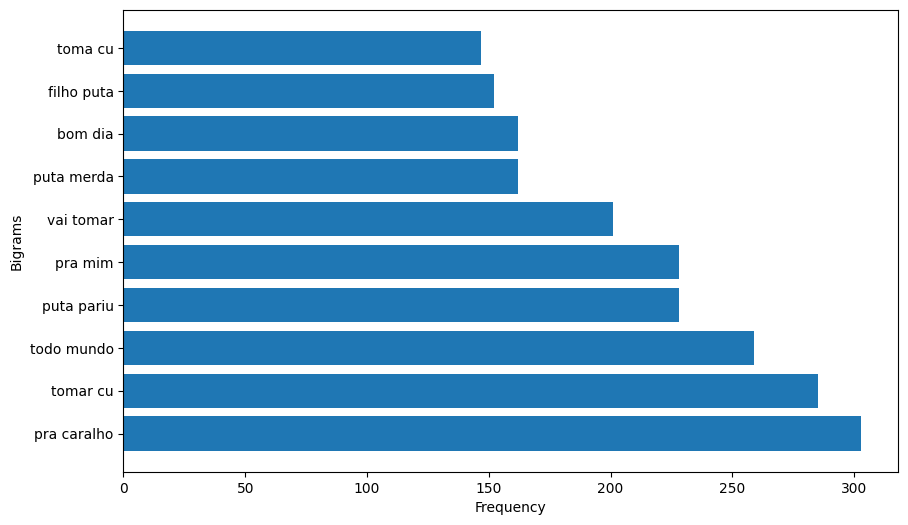

In [75]:
# Count the frequency of bigrams
bigram_frequency = Counter()
for bigram_list in df_tupi_hier['bigrams']:
    bigram_frequency.update(bigram_list)

# Get the most frequent bigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

most_common_bigrams = [(b, freq) for b, freq in bigram_frequency.most_common() if all(term not in b and all(char not in b for char in exclude_punctuation) for term in exclude_terms)][:10]

# Unzip bigram and frequency into separate lists and convert bigrams to strings
bigram, frequency = zip(*most_common_bigrams)
bigram = [' '.join(b) for b in bigram]

# Create a chart for the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram,frequency)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
#plt.title('Top 10 Most Frequent Bigrams (Excluding Specific Terms and Punctuation)')
plt.show()


### 4) Trigram without stopwords

In [76]:
from nltk.util import ngrams

In [77]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_hierarchy.csv"
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_hier = pd.read_csv(csv_file_path)

In [78]:
df_tupi_hier['text'] = df_tupi_hier['text'].str.lower()

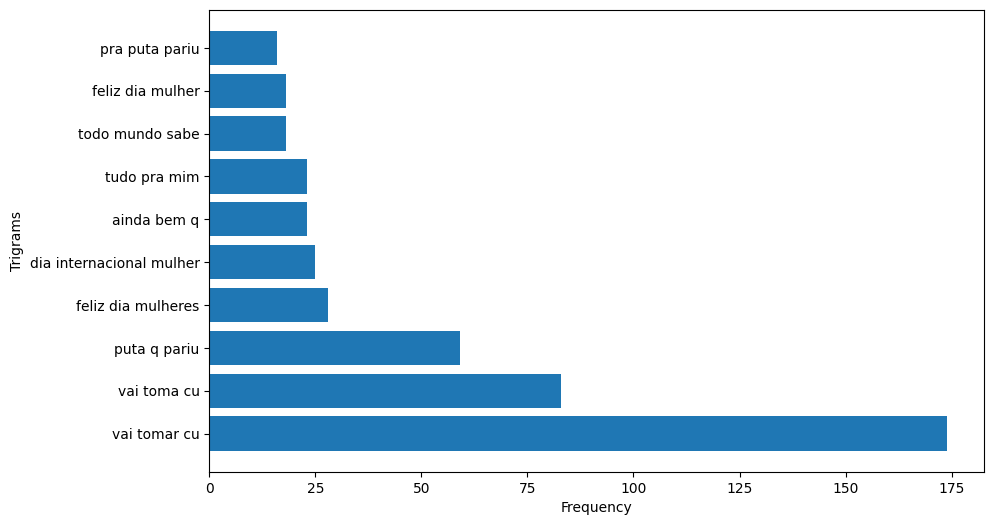

In [79]:
# Function to remove stopwords and tokenize text, excluding specific words
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

# Apply preprocessing to the 'text' column
df_tupi_hier['preprocessed_text'] = df_tupi_hier['text'].apply(preprocess_text)

# Create trigrams from the preprocessed text
df_tupi_hier['trigrams'] = df_tupi_hier['preprocessed_text'].apply(lambda x: list(ngrams(x, 3)))  # Use ngrams with n=3

# Count the frequency of trigrams
trigram_frequency = Counter()
for trigram_list in df_tupi_hier['trigrams']:
    trigram_frequency.update(trigram_list)

# Get the most frequent trigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

most_common_trigrams = [(t, freq) for t, freq in trigram_frequency.most_common() if all(term not in t and all(char not in t for char in exclude_punctuation) for term in exclude_terms)][:10]

# Unzip trigram and frequency into separate lists and convert trigrams to strings
trigram, frequency = zip(*most_common_trigrams)
trigram = [' '.join(t) for t in trigram]

# Create a chart for the most frequent trigrams
plt.figure(figsize=(10, 6))
plt.barh(trigram, frequency)
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
#plt.title('Top 10 Most Frequent Trigrams (Excluding Specific Terms and Punctuation)')
plt.show()


### 5) Frequency

In [80]:
# Specify the name of the CSV file you want to access
csv_file_name = "tupi_binary.csv"
# Construct the full path to the "tupi.csv" file
csv_file_path = os.path.join(datasets_folder, csv_file_name)

# Check if the file exists before attempting to read it
if os.path.isfile(csv_file_path):
    # Load the "tupi.csv" file into a DataFrame
    df_tupi_binary = pd.read_csv(csv_file_path)

In [81]:
df_tupi_binary['text'] = df_tupi_binary['text'].str.lower()

In [82]:
df_tupi_binary.head()

,source,id,text,researcher,year,aggressive,hate
0,twitter,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,oliveira et al,2023,1,1
1,twitter,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,oliveira et al,2023,1,1
2,twitter,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,oliveira et al,2023,1,1
3,twitter,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,oliveira et al,2023,1,1
4,twitter,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,oliveira et al,2023,1,1


In [83]:
# Function to remove stopwords and tokenize text, excluding specific words
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

# Apply preprocessing to the 'text' column
df_tupi_binary['preprocessed_text'] = df_tupi_binary['text'].apply(preprocess_text)

# Create bigrams from the preprocessed text
df_tupi_binary['bigrams'] = df_tupi_binary['preprocessed_text'].apply(lambda x: list(bigrams(x)))

In [84]:
# Get the most frequent bigrams while excluding specific terms and punctuation
exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :'}
exclude_punctuation = set(string.punctuation)

In [85]:
df_tupi_binary.head()

,source,id,text,researcher,year,aggressive,hate,preprocessed_text,bigrams
0,twitter,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,oliveira et al,2023,1,1,"[user, user, user, quanto, vc, pagava, época, ...","[(user, user), (user, user), (user, quanto), (..."
1,twitter,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,oliveira et al,2023,1,1,"[user, árabes, vão, chutar, país, ?, ?]","[(user, árabes), (árabes, vão), (vão, chutar),..."
2,twitter,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,oliveira et al,2023,1,1,"[user, user, user, user, user, desenhar, expli...","[(user, user), (user, user), (user, user), (us..."
3,twitter,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,oliveira et al,2023,1,1,"[user, user, chola, gado, ., quiser, pagar, ba...","[(user, user), (user, chola), (chola, gado), (..."
4,twitter,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,oliveira et al,2023,1,1,"[michele, micheque, nao, cartao, bolsonaro, pq...","[(michele, micheque), (micheque, nao), (nao, c..."


/tmp/ipykernel_7016/2932269453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))
/tmp/ipykernel_7016/2932269453.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size
/tmp/ipykernel_7016/2932269453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

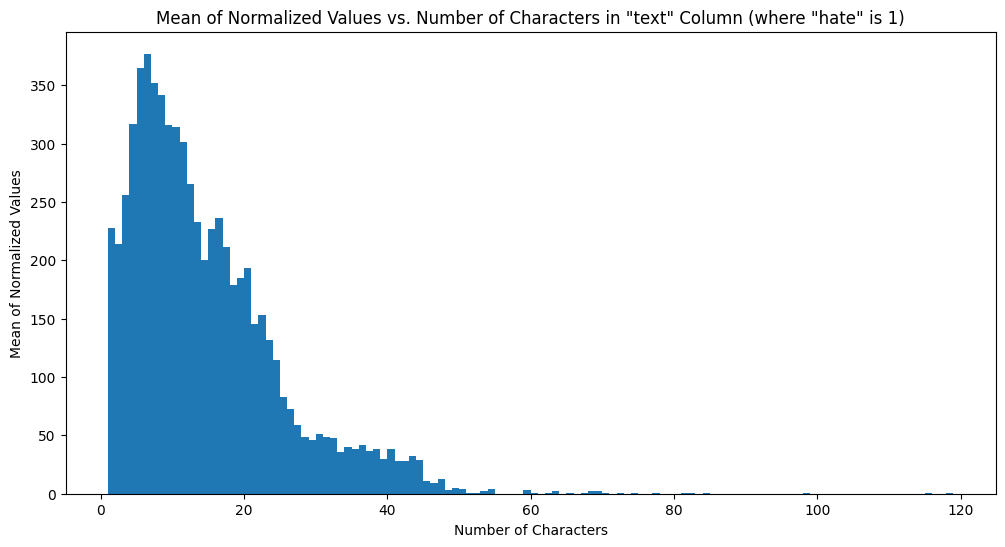

In [86]:
# Filter the DataFrame for rows where 'hate' is equal to 1
df_filtered = df_tupi_binary[df_tupi_binary['hate'] == 1]

# Calculate the number of unique words in each row of the "text" column
df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))

# Define the bin size (e.g., 50 unique words)
bin_size = 1

# Group the data into bins of a specific number of unique words
df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size

# Create a Min-Max scaler to normalize the data within each bin between 0 and 1
scaler = MinMaxScaler()
df_filtered['unique_words_normalized'] = df_filtered.groupby('bin')['unique_words'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Calculate the mean of the normalized values within each bin
mean_normalized_values = df_filtered.groupby('bin')['unique_words_normalized'].count()

# Create a bar chart with number of characters on the x-axis and mean frequency on the y-axis
plt.figure(figsize=(12, 6))

# Set the bar width to make them contiguous
bar_width = bin_size

# Set the bar alignment to remove gaps
plt.bar(mean_normalized_values.index, mean_normalized_values.values, width=bar_width, align='edge')
plt.xlabel('Number of Characters')
plt.ylabel('Mean of Normalized Values')
plt.title('Mean of Normalized Values vs. Number of Characters in "text" Column (where "hate" is 1)')

# Show the chart
plt.show()

/tmp/ipykernel_7016/477048003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))
/tmp/ipykernel_7016/477048003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size
/tmp/ipykernel_7016/477048003.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



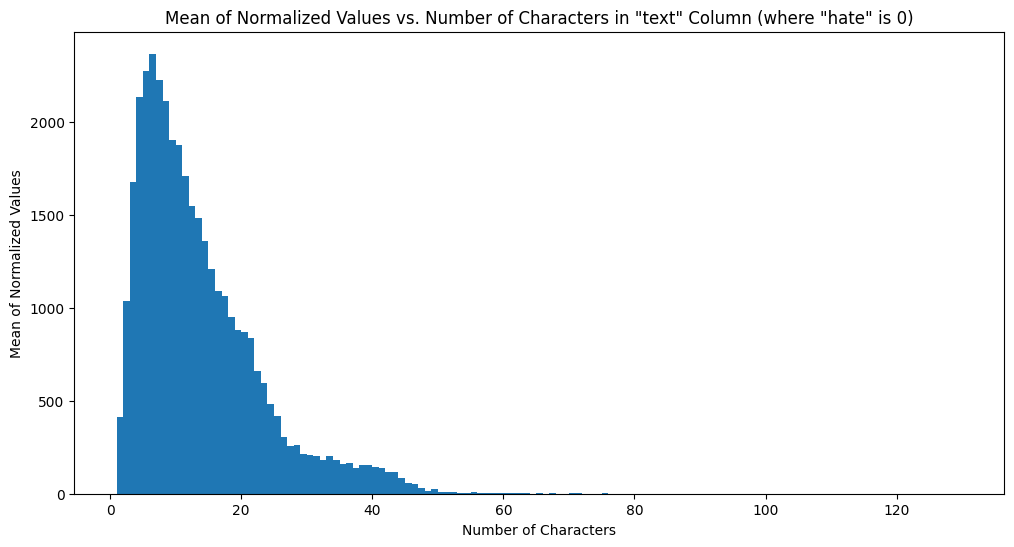

In [87]:
# Filter the DataFrame for rows where 'hate' is equal to 1
df_filtered = df_tupi_binary[df_tupi_binary['hate'] == 0]

# Calculate the number of unique words in each row of the "text" column
df_filtered['unique_words'] = df_filtered['text'].apply(lambda x: len(set(x.split())))

# Define the bin size (e.g., 50 unique words)
bin_size = 1

# Group the data into bins of a specific number of unique words
df_filtered['bin'] = (df_filtered['unique_words'] // bin_size) * bin_size

# Create a Min-Max scaler to normalize the data within each bin between 0 and 1
scaler = MinMaxScaler()
df_filtered['unique_words_normalized'] = df_filtered.groupby('bin')['unique_words'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Calculate the mean of the normalized values within each bin
mean_normalized_values = df_filtered.groupby('bin')['unique_words_normalized'].count()

# Create a bar chart with number of characters on the x-axis and mean frequency on the y-axis
plt.figure(figsize=(12, 6))

# Set the bar width to make them contiguous
bar_width = bin_size

# Set the bar alignment to remove gaps
plt.bar(mean_normalized_values.index, mean_normalized_values.values, width=bar_width, align='edge')
plt.xlabel('Number of Characters')
plt.ylabel('Mean of Normalized Values')
plt.title('Mean of Normalized Values vs. Number of Characters in "text" Column (where "hate" is 0)')

# Show the chart
plt.show()

In [88]:
df_tupi.head()

,source,id,text,researcher,year,aggressive,hate
0,twitter,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,oliveira et al,2023,1,1
1,twitter,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,oliveira et al,2023,1,1
2,twitter,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,oliveira et al,2023,1,1
3,twitter,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,oliveira et al,2023,1,1
4,twitter,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,oliveira et al,2023,1,1


In [89]:
df_tupi_limpo = df_tupi.query(f"hate == 1")
df_tupi_limpo.head()

,source,id,text,researcher,year,aggressive,hate
0,twitter,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,oliveira et al,2023,1,1
1,twitter,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,oliveira et al,2023,1,1
2,twitter,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,oliveira et al,2023,1,1
3,twitter,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,oliveira et al,2023,1,1
4,twitter,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,oliveira et al,2023,1,1


In [90]:
# adicionar pesos e espessura
# matriz de pesos

In [91]:
import numpy as np

In [92]:
# Process and tokenize text data
stop_words = set(stopwords.words("portuguese"))  # You can choose a different language

# Define terms to exclude
exclude_terms = {'desse','aí','n','https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :','rt','ta','tá','q','pq','ter','pra','vcs',
 'todos',
 'aí',
 'nunca',
 'fala',
 'ver',
 'coisa',
 'desse',
 'todo',
 'quer',
 'agora',
 'faz',
 'n',
 'fazer',
 'ainda',
 'dia',
 'pode',
 'tudo',
 'nao',
 'nada',
 'vc',
 'vai'}

# Create a list of words
all_words = []
for text in df_tupi_limpo["text"]:
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove punctuation and convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word not in exclude_terms]  # Remove excluded terms
    all_words.extend(tokens)

# Create a list of unique words
unique_words = list(set(all_words))

# Create a word-to-index mapping
word_to_index = {word: i for i, word in enumerate(unique_words)}

# Initialize a weight matrix
num_words = len(unique_words)
weight_matrix = np.zeros((num_words, num_words))

In [93]:
# Fill the weight matrix based on co-occurrence
window_size = 2
for text in df_tupi_limpo["text"]:
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in exclude_terms]
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            word1 = tokens[i]
            word2 = tokens[j]
            if word1 in word_to_index and word2 in word_to_index:
                index1 = word_to_index[word1]
                index2 = word_to_index[word2]
                weight_matrix[index1][index2] += 1
                weight_matrix[index2][index1] += 1

# Calculate the importance of each word based on the sum of weights
word_importance = weight_matrix.sum(axis=1)

# Select the top 15 most influential words
top_words_indices = np.argsort(word_importance)[-50:]
top_words = [unique_words[i] for i in top_words_indices]

In [94]:
top_words

['burro',
 'vou',
 'fica',
 'vida',
 'pessoas',
 'assim',
 'dar',
 'ficar',
 'p',
 'sim',
 'eh',
 'vão',
 'tomar',
 'porque',
 'tão',
 'né',
 'sapatão',
 'idiota',
 'sabe',
 'aqui',
 'contra',
 'sempre',
 'pau',
 'filho',
 'mundo',
 'vergonha',
 'país',
 'falar',
 'esquerda',
 'governo',
 'deus',
 'presidente',
 'lula',
 'burra',
 'porra',
 'caralho',
 'bem',
 'merda',
 'povo',
 'homem',
 'gorda',
 'lixo',
 'gente',
 'feia',
 'brasil',
 'cu',
 'puta',
 'cara',
 'mulher',
 'bolsonaro']

In [95]:
# Create a subgraph with only the top 15 words and their connections
G = nx.Graph()
for word in top_words:
    importance = word_importance[word_to_index[word]]
    # Rescale importance values to node sizes within a reasonable range
    node_size = 100 + 1000 * (importance - min(word_importance)) / (max(word_importance) - min(word_importance))
    G.add_node(word, importance=importance, size=node_size)

for i in top_words_indices:
    for j in top_words_indices:
        if i != j:
            weight = weight_matrix[i][j]
            if weight > 0:
                word1 = unique_words[i]
                word2 = unique_words[j]
                G.add_edge(word1, word2, weight=weight)

NameError: name 'nx' is not defined

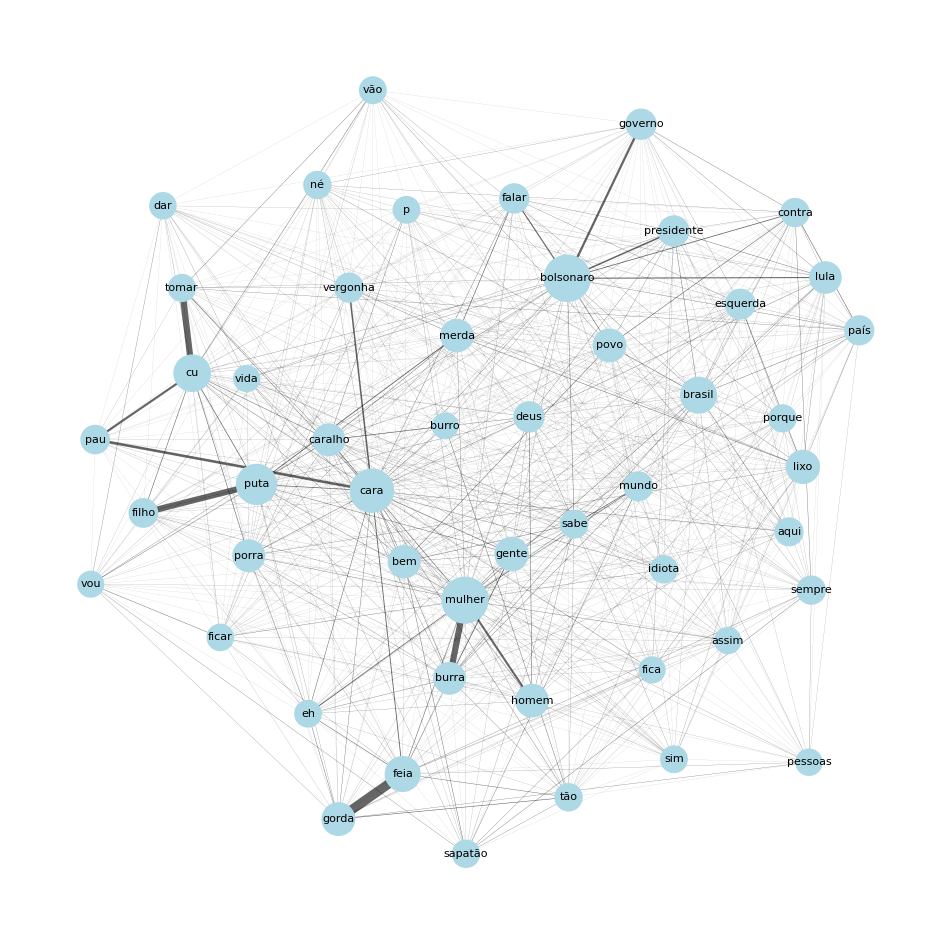

In [ ]:
# Draw the word graph with node sizes based on importance and thinner edges
pos = nx.spring_layout(G, k=0.15)  # Adjust k for better layout
node_sizes = [G.nodes[node]['size'] for node in G.nodes]
# Reduce the edge widths by a scaling factor (e.g., 0.05)
edge_widths = [0.05 * (0.1 + G[word1][word2]['weight']) for word1, word2 in G.edges()]
labels = {word: word for word in G.nodes()}
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")
plt.axis("off")
plt.show()

### Racism

In [ ]:
df_tupi_hier.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source
0,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,1,1,0,0,0,1,0,1,0,0,0,0,0,oliveira et al,2023,twitter
1,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,1,1,0,0,0,0,0,0,0,0,0,1,0,oliveira et al,2023,twitter
2,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter
3,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,1,1,0,0,0,0,0,1,0,0,0,0,0,oliveira et al,2023,twitter
4,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter


In [ ]:
df_tupi_hier_limpo_ras = df_tupi_hier.query(f"racism == 1")
df_tupi_hier_limpo_ras.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source
19,1.65849052316904e+18,@user aposta todo al negro amigo,1,1,0,0,0,0,0,0,1,0,0,0,0,oliveira et al,2023,twitter
776,1.65848962768112e+18,@user @user este nabo tratar-se bem depois que...,1,1,0,0,0,0,0,0,1,0,0,0,0,oliveira et al,2023,twitter
778,1.65848962975728e+18,branco faz qualquer coisa e e ovacionado né? p...,1,1,0,0,0,0,0,0,1,0,0,0,0,oliveira et al,2023,twitter
782,1.65848918112614e+18,@user é verdade; por isso bolsonaro indicou do...,1,1,0,0,0,0,0,1,1,0,0,0,0,oliveira et al,2023,twitter
837,1.65848568741351e+18,@user ele pagou seu ingresso da deixa em off s...,1,1,0,0,0,0,0,0,1,0,0,0,0,oliveira et al,2023,twitter


In [ ]:
df_tupi_hier_limpo_ras =df_tupi_hier_limpo_ras[["text","racism"]]

In [ ]:
df_tupi_hier_limpo_ras.head()

,text,racism
19,@user aposta todo al negro amigo,1
776,@user @user este nabo tratar-se bem depois que...,1
778,branco faz qualquer coisa e e ovacionado né? p...,1
782,@user é verdade; por isso bolsonaro indicou do...,1
837,@user ele pagou seu ingresso da deixa em off s...,1


In [ ]:
len(df_tupi_hier_limpo_ras)

290

In [ ]:
# Process and tokenize text data
stop_words = set(stopwords.words("portuguese"))  # You can choose a different language

# Define terms to exclude
exclude_terms = {'desse','aí','n','https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :','rt','ta','tá','q','pq','ter','pra','vcs',
 'todos',
 'aí',
 'nunca',
 'fala',
 'ver',
 'coisa',
 'desse',
 'todo',
 'quer',
 'agora',
 'faz',
 'n',
 'fazer',
 'ainda',
 'dia',
 'pode',
 'tudo',
 'nao',
 'nada',
 'vc',
 'vai'}

# Create a list of words
all_words = []
for text in df_tupi_hier_limpo_ras["text"]:
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove punctuation and convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word not in exclude_terms]  # Remove excluded terms
    all_words.extend(tokens)

# Create a list of unique words
unique_words = list(set(all_words))

# Create a word-to-index mapping
word_to_index = {word: i for i, word in enumerate(unique_words)}

# Initialize a weight matrix
num_words = len(unique_words)
weight_matrix = np.zeros((num_words, num_words))

In [ ]:
# Fill the weight matrix based on co-occurrence
window_size = 2
for text in df_tupi_hier_limpo_ras["text"]:
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in exclude_terms]
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            word1 = tokens[i]
            word2 = tokens[j]
            if word1 in word_to_index and word2 in word_to_index:
                index1 = word_to_index[word1]
                index2 = word_to_index[word2]
                weight_matrix[index1][index2] += 1
                weight_matrix[index2][index1] += 1

# Calculate the importance of each word based on the sum of weights
word_importance = weight_matrix.sum(axis=1)

# Select the top 15 most influential words
top_words_indices = np.argsort(word_importance)[-50:]
top_words = [unique_words[i] for i in top_words_indices]

In [ ]:
# Create a subgraph with only the top 15 words and their connections
G = nx.Graph()
for word in top_words:
    importance = word_importance[word_to_index[word]]
    # Rescale importance values to node sizes within a reasonable range
    node_size = 100 + 1000 * (importance - min(word_importance)) / (max(word_importance) - min(word_importance))
    G.add_node(word, importance=importance, size=node_size)

for i in top_words_indices:
    for j in top_words_indices:
        if i != j:
            weight = weight_matrix[i][j]
            if weight > 0:
                word1 = unique_words[i]
                word2 = unique_words[j]
                G.add_edge(word1, word2, weight=weight)

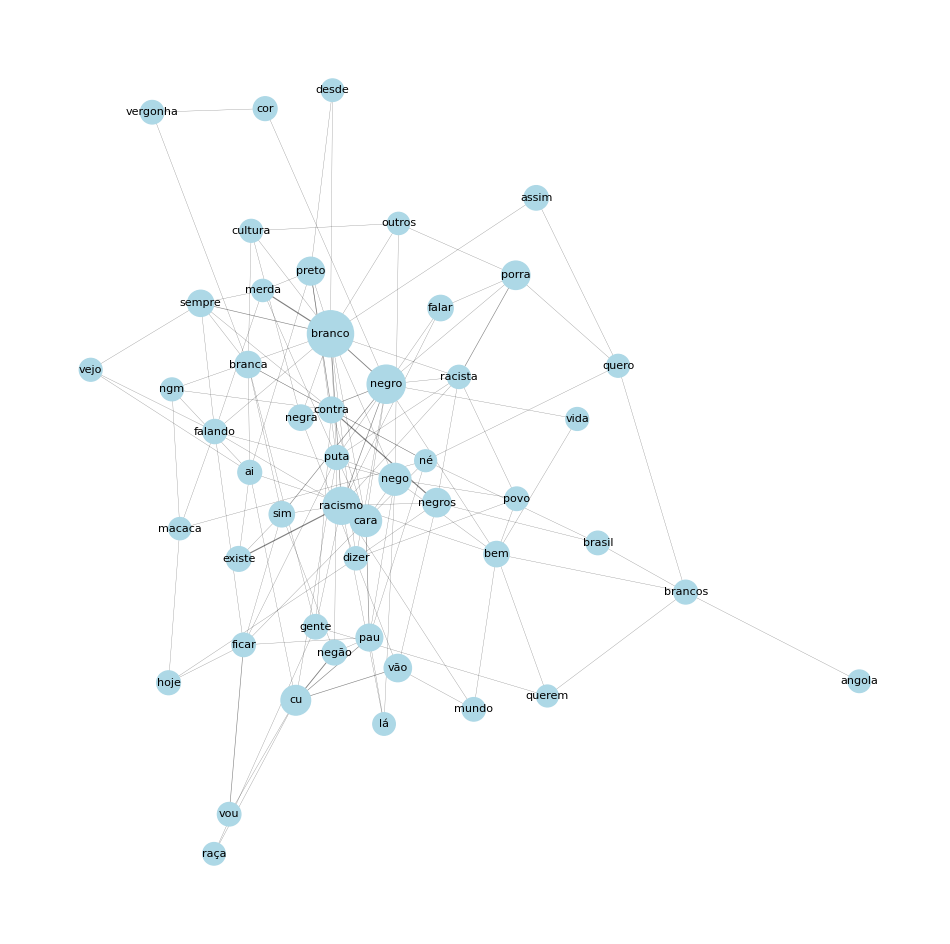

In [ ]:
# Draw the word graph with node sizes based on importance and thinner edges
pos = nx.spring_layout(G, k=0.15)  # Adjust k for better layout
node_sizes = [G.nodes[node]['size'] for node in G.nodes]
# Reduce the edge widths by a scaling factor (e.g., 0.05)
edge_widths = [0.2 * (0.1 + G[word1][word2]['weight']) for word1, word2 in G.edges()]
labels = {word: word for word in G.nodes()}
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")
plt.axis("off")
plt.show()

### Misoginy

In [ ]:
df_tupi_hier_limpo_mis = df_tupi_hier.query(f"misogyny == 1")
df_tupi_hier_limpo_mis.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source
7,1.65848558463628e+18,@user porra q odio kkkkk sua cachorra ????????,1,1,0,0,0,0,0,0,0,0,1,0,0,oliveira et al,2023,twitter
15,1.65848584525358e+18,"ou você é bonita ou você dirige bem, não dá pr...",1,1,0,0,0,0,0,0,0,0,1,0,0,oliveira et al,2023,twitter
16,1.65848501267584e+18,"lei de acesso à informação foi ""estuprada"" pel...",1,1,0,0,0,0,0,0,0,0,1,0,0,oliveira et al,2023,twitter
17,1.65849054753795e+18,@user prefiro mamar no seu seios seios maravil...,1,1,0,0,0,0,0,0,0,0,1,0,0,oliveira et al,2023,twitter
18,1.65849054945489e+18,@user @user falsidade sem igual. fala mau enqu...,1,1,0,0,0,0,0,0,0,0,1,0,0,oliveira et al,2023,twitter


In [ ]:
df_tupi_hier_limpo_mis =df_tupi_hier_limpo_mis[["text","misogyny"]]

In [ ]:
# Process and tokenize text data
stop_words = set(stopwords.words("portuguese"))  # You can choose a different language

# Define terms to exclude
exclude_terms = {'desse','aí','n','https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :','rt','ta','tá','q','pq','ter','pra','vcs',
 'todos',
 'aí',
 'nunca',
 'fala',
 'ver',
 'coisa',
 'desse',
 'todo',
 'quer',
 'agora',
 'faz',
 'n',
 'fazer',
 'ainda',
 'dia',
 'pode',
 'tudo',
 'nao',
 'nada',
 'vc',
 'vai'}

# Create a list of words
all_words = []
for text in df_tupi_hier_limpo_mis["text"]:
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove punctuation and convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word not in exclude_terms]  # Remove excluded terms
    all_words.extend(tokens)

# Create a list of unique words
unique_words = list(set(all_words))

# Create a word-to-index mapping
word_to_index = {word: i for i, word in enumerate(unique_words)}

# Initialize a weight matrix
num_words = len(unique_words)
weight_matrix = np.zeros((num_words, num_words))

In [ ]:
# Fill the weight matrix based on co-occurrence
window_size = 2
for text in df_tupi_hier_limpo_mis["text"]:
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in exclude_terms]
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            word1 = tokens[i]
            word2 = tokens[j]
            if word1 in word_to_index and word2 in word_to_index:
                index1 = word_to_index[word1]
                index2 = word_to_index[word2]
                weight_matrix[index1][index2] += 1
                weight_matrix[index2][index1] += 1

# Calculate the importance of each word based on the sum of weights
word_importance = weight_matrix.sum(axis=1)

# Select the top 15 most influential words
top_words_indices = np.argsort(word_importance)[-50:]
top_words = [unique_words[i] for i in top_words_indices]

In [ ]:
# Create a subgraph with only the top 15 words and their connections
G = nx.Graph()
for word in top_words:
    importance = word_importance[word_to_index[word]]
    # Rescale importance values to node sizes within a reasonable range
    node_size = 100 + 1000 * (importance - min(word_importance)) / (max(word_importance) - min(word_importance))
    G.add_node(word, importance=importance, size=node_size)

for i in top_words_indices:
    for j in top_words_indices:
        if i != j:
            weight = weight_matrix[i][j]
            if weight > 0:
                word1 = unique_words[i]
                word2 = unique_words[j]
                G.add_edge(word1, word2, weight=weight)

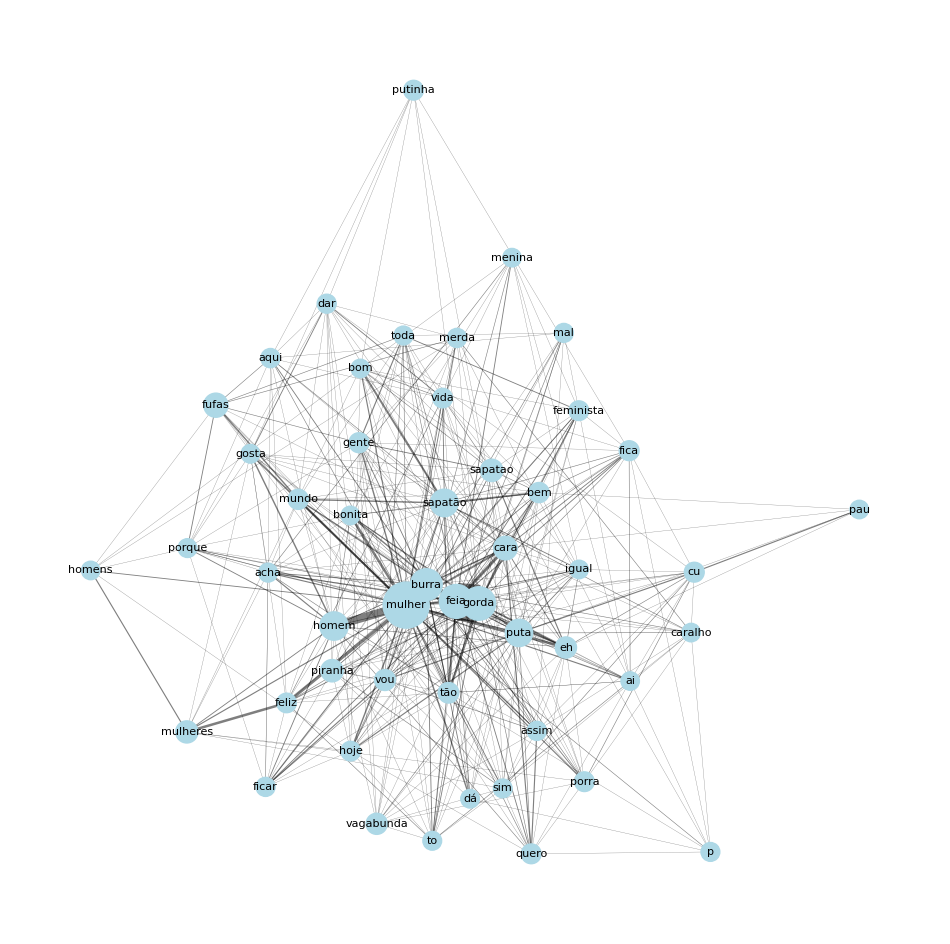

In [ ]:
# Draw the word graph with node sizes based on importance and thinner edges
pos = nx.spring_layout(G, k=0.15)  # Adjust k for better layout
node_sizes = [G.nodes[node]['size'] for node in G.nodes]
# Reduce the edge widths by a scaling factor (e.g., 0.05)
edge_widths = [0.2 * (0.1 + G[word1][word2]['weight']) for word1, word2 in G.edges()]
labels = {word: word for word in G.nodes()}
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")
plt.axis("off")
plt.show()

In [119]:
df_tupi.head()

,source,id,text,researcher,year,aggressive,hate
0,twitter,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,oliveira et al,2023,1,1
1,twitter,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,oliveira et al,2023,1,1
2,twitter,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,oliveira et al,2023,1,1
3,twitter,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,oliveira et al,2023,1,1
4,twitter,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,oliveira et al,2023,1,1


In [ ]:
len(df_tupi["researcher"])

43668

In [120]:
count_aggressive_0 = len(df_tupi[df_tupi["hate"] == 1])

In [114]:
df_tupi_hier.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source
0,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,1,1,0,0,0,1,0,1,0,0,0,0,0,oliveira et al,2023,twitter
1,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,1,1,0,0,0,0,0,0,0,0,0,1,0,oliveira et al,2023,twitter
2,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter
3,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,1,1,0,0,0,0,0,1,0,0,0,0,0,oliveira et al,2023,twitter
4,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter


In [145]:
# Count the occurrences of values in the specified columns
count_columns = df_tupi_hier.iloc[:, 4:15].sum()

In [146]:
count_columns

ageism                     57
aporophobia                66
body_shame                285
capacitism                 99
lgbtphobia                805
political                1149
racism                    290
religious_intolerance     108
misogyny                 1675
xenophobia                357
other                    4476
dtype: int64

In [113]:
print(1+1)

2


In [123]:
df_tupi_hier_ver = df_tupi_hier.query(f"hate == 1")
df_tupi_hier_ver.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source
0,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,1,1,0,0,0,1,0,1,0,0,0,0,0,oliveira et al,2023,twitter
1,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,1,1,0,0,0,0,0,0,0,0,0,1,0,oliveira et al,2023,twitter
2,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter
3,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,1,1,0,0,0,0,0,1,0,0,0,0,0,oliveira et al,2023,twitter
4,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter


In [124]:
df_tupi_hier_ver["hate"].unique()

array([1])

In [125]:
df_tupi_hier_ver["aggressive"].unique()

array([1])

In [126]:
df_tupi_hier_ver["ver"] = df_tupi_hier_ver["aggressive"] + df_tupi_hier_ver["hate"] + df_tupi_hier_ver["ageism"] + df_tupi_hier_ver["aporophobia"] + df_tupi_hier_ver["body_shame"] + df_tupi_hier_ver["capacitism"] + df_tupi_hier_ver["lgbtphobia"] + df_tupi_hier_ver["political"] + df_tupi_hier_ver["racism"] + df_tupi_hier_ver["religious_intolerance"] + df_tupi_hier_ver["misogyny"] + df_tupi_hier_ver["xenophobia"] + df_tupi_hier_ver["other"]

/tmp/ipykernel_7016/1089287294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tupi_hier_ver["ver"] = df_tupi_hier_ver["aggressive"] + df_tupi_hier_ver["hate"] + df_tupi_hier_ver["ageism"] + df_tupi_hier_ver["aporophobia"] + df_tupi_hier_ver["body_shame"] + df_tupi_hier_ver["capacitism"] + df_tupi_hier_ver["lgbtphobia"] + df_tupi_hier_ver["political"] + df_tupi_hier_ver["racism"] + df_tupi_hier_ver["religious_intolerance"] + df_tupi_hier_ver["misogyny"] + df_tupi_hier_ver["xenophobia"] + df_tupi_hier_ver["other"]


In [127]:
df_tupi_hier_ver.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source,ver
0,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,1,1,0,0,0,1,0,1,0,0,0,0,0,oliveira et al,2023,twitter,4
1,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,1,1,0,0,0,0,0,0,0,0,0,1,0,oliveira et al,2023,twitter,3
2,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter,3
3,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,1,1,0,0,0,0,0,1,0,0,0,0,0,oliveira et al,2023,twitter,3
4,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter,3


In [128]:
df_tupi_hier_ver["ver"].unique()

array([4, 3, 2, 5, 6])

In [129]:
df_tupi_hier_ver_2 = df_tupi_hier_ver.query(f"ver == 2")

In [130]:
df_tupi_hier_ver_2.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source,ver
757,1.65848623560486e+18,@user suicid4te pelotudo,1,1,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,2
761,1.65848410462578e+18,@user @user 1- não confunda bolsonaro com elei...,1,1,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,2
762,1.65848561713378e+18,o crime de ódio vem e tá chegando a foguete,1,1,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,2
10002,-,Essa nao tem vergonha na cara!!,1,1,0,0,0,0,0,0,0,0,0,0,0,vargas et al,2021,instagram,2
10003,-,Essa mulher é doente.pilantra!,1,1,0,0,0,0,0,0,0,0,0,0,0,vargas et al,2021,instagram,2


In [140]:
len(df_tupi_hier.query("hate == 1"))

6806

In [141]:
len(df_tupi_hier.query("aggressive == 1"))

11273

In [142]:
11273-6806

4467